### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

# ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2
## Нелинейная регрессия

### Дисциплина: Методы машинного обучения

##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №6

1. Набор данных: wine_quality

2. Независимая переменная: features/chlorides

3. Зависимая переменная: features/alcohol

4. Доп. признак: имеющий максимальную дисперсию

5. Визуализация доп. признака – эмпирическая плотность распределения

6. Показатель качества регрессии – MAE (mean absolute error)

7. Степень полинома: 3

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – сигмоида.

**Задание 1**  
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.  

Загрузила набор данных из Tensorflow Datasets

In [ ]:
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

data = tfds.load("wine_quality", split='train')
data


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/4898 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/incomplete.LZLC9G_1.0.0/wine_quality-train.tfrecord*...…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

Преобразовала в датафрейм

In [ ]:
data = tfds.as_dataframe(data)
data.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


Видно, что в наборе все признаки принимают числовые значения, но поскольку вывод отображает всего пару строк, а их гораздо больше, и все просмотреть не получится, то на всякий случай выполним выборку только числовых столбцов из DataFrame:

In [ ]:
import numpy as np
data_frame = data.select_dtypes(include=[np.number])
data_frame.shape

(4898, 12)

Вывод показывает, что DataFrame содержит 4898 строк и 12 столбцов.

**Задание 2**  
Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  

Необходимо удалить точки с выбросами из набора данных на основе стандартизированной оценки Z-score. Вычислим Z-оценку для каждой точки данных:

In [ ]:
z_scores = (data_frame - data_frame.mean()) / data_frame.std()
z_scores[:7]

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,-1.230491,0.376586,0.047996,2.264409,0.883091,0.511074,0.210153,2.357738,0.527077,1.379812,0.414297,-0.991273
1,1.369823,0.788524,1.287463,-0.978754,-0.657434,-0.018115,1.269752,-1.023532,-0.612016,-1.090889,-0.081761,0.137856
2,0.557224,-0.767685,-1.852519,-1.092427,-1.842453,-1.723282,2.130675,-1.043248,-0.086281,-2.055638,1.505626,-2.120401
3,-1.230491,2.939754,-0.530421,0.900275,-0.301929,-0.900098,-0.716996,0.849475,-0.699639,-0.832053,1.307203,0.137856
4,1.207303,-0.493060,-0.282528,-1.293048,-1.131442,1.275459,-0.650771,-0.510920,-1.312997,-0.079078,0.612721,0.137856
5,-0.174114,0.422357,0.461152,0.833395,0.172079,0.393477,1.203526,0.218567,0.439455,1.873952,0.315086,-0.991273
6,0.150925,0.376586,0.130627,-0.751408,0.527585,-0.253310,-0.054746,-0.944669,-0.173903,0.226818,0.017450,-0.991273


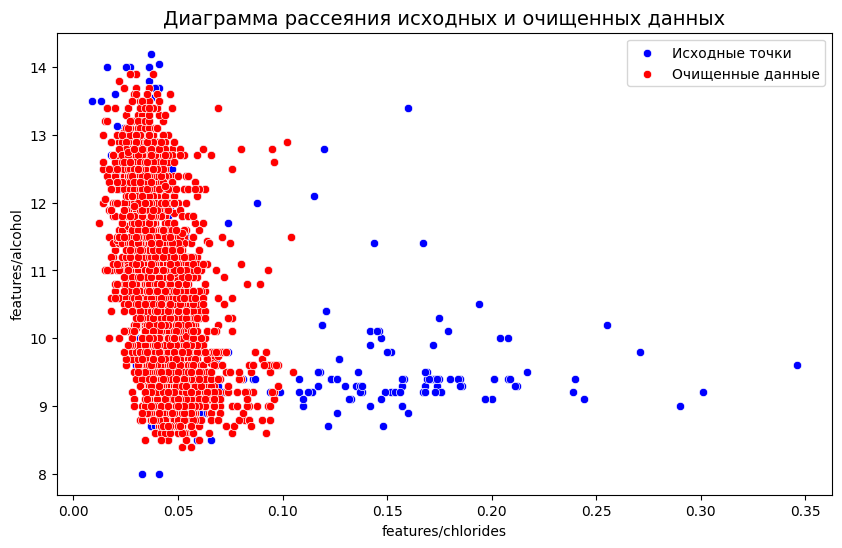

Число точек до удаления: 4898
После удаления: 4413


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

abs_z_scores = np.abs(z_scores)
num_points_before = len(data_frame)

for threshold in np.arange(2.0, 3.5, 0.1):
    outlier_indices = (abs_z_scores > threshold).any(axis=1)
    outlier_percentage = sum(outlier_indices) / len(data) * 100

    # Если процент выбросов находится в диапазоне от 5% до 10%, продолжаем
    if 5 <= outlier_percentage <= 10:
        cleaned_data = data_frame[~outlier_indices]
        num_points_after = len(cleaned_data)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='features/chlorides', y='features/alcohol', data=data, label='Исходные точки', color='blue')
        sns.scatterplot(x='features/chlorides', y='features/alcohol', data=cleaned_data, label='Очищенные данные', color='red')
        plt.xlabel('features/chlorides')
        plt.ylabel('features/alcohol')
        plt.title('Диаграмма рассеяния исходных и очищенных данных', fontsize=14)
        plt.legend()
        plt.show()
        print ((f'Число точек до удаления: {num_points_before}\nПосле удаления: {num_points_after}'))
        break


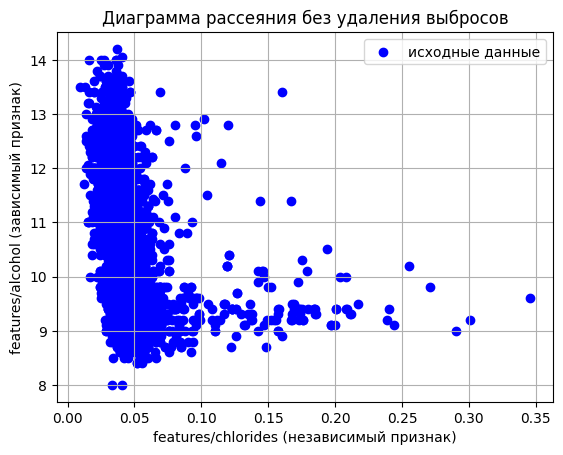

In [ ]:
plt.scatter(data_frame['features/chlorides'], data_frame['features/alcohol'], color='blue', label='исходные данные')
plt.xlabel('features/chlorides (независимый признак)')
plt.ylabel('features/alcohol (зависимый признак)')
plt.title('Диаграмма рассеяния без удаления выбросов')
plt.legend()
plt.grid(True)
plt.show()

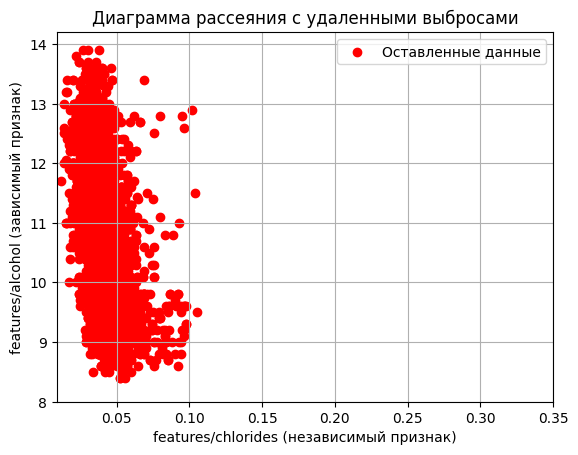

In [ ]:
plt.scatter(cleaned_data['features/chlorides'], cleaned_data['features/alcohol'], color='r', label='Оставленные данные')

plt.xlim(data_frame['features/chlorides'].min(),0.35)
plt.ylim(8, data_frame['features/alcohol'].max())

plt.xlabel('features/chlorides (независимый признак)')
plt.ylabel('features/alcohol (зависимый признак)')
plt.title('Диаграмма рассеяния с удаленными выбросами')
plt.legend()
plt.grid(True)
plt.show()

**Задание 3**  
Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Text(0.5, 1.0, 'График после преобразования')

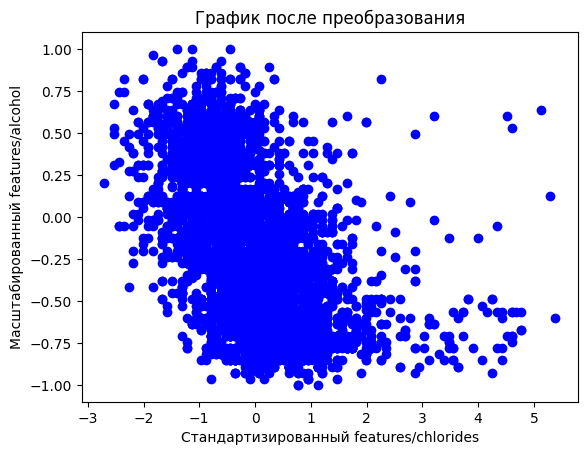

In [ ]:
x = cleaned_data['features/chlorides']
y = cleaned_data['features/alcohol']

x_s = (x - np.mean(x))/np.std(x)
y_m = -1 + 2 * (y - np.min(y))/(np.max(y) - np.min(y))

plt.scatter(x_s, y_m,  color='b')
plt.xlabel("Стандартизированный features/chlorides")
plt.ylabel("Масштабированный features/alcohol")
plt.title("График после преобразования")

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

Создала модель нейронной сети с одним нейроном для линейной регрессии. Компилировала модель, указывая функцию потерь, оптимизатор и метрику.

In [ ]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

linear_model.compile(
     loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mean_absolute_error'])

history_line = linear_model.fit(
    x_s, y_m,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

# Предсказание и расчет MAE
y_pred = linear_model.predict(x_s)
mae = mean_absolute_error(y_m, y_pred)
print(f'Mean Absolute Error: {mae}')

Epoch 1/100
111/111 [==============================] - 1s 4ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - val_loss: 0.3091 - val_mean_absolute_error: 0.3091
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - val_loss: 0.3133 - val_mean_absolute_error: 0.3133
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - val_loss: 0.3095 - val_mean_absolute_error: 0.3095
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - val_loss: 0.3089 - val_mean_absolute_error: 0.3089
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - val_loss: 0.3098 - val_mean_absolute_error: 0.3098
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - val_loss: 0.3091 - val_mean_absolute_error: 0.3091
Epoch 7/10

Чем меньше значение MAE (0.3078), тем лучше, так как она показывает меньшее среднее абсолютное отклонение от истинных значений.

138/138 [==============================] - 0s 3ms/step


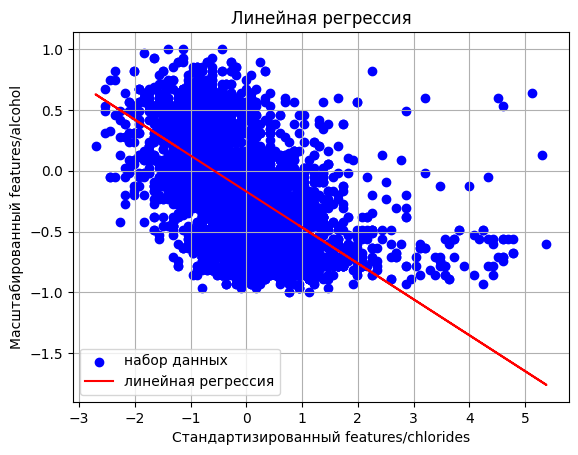

In [ ]:
y_predict_line = linear_model.predict(x_s)

plt.scatter(x_s, y_m,  color='b', label='набор данных')
plt.plot(x_s, y_predict_line, color='r', label='линейная регрессия')
plt.title("Линейная регрессия")
plt.xlabel("Стандартизированный features/chlorides")
plt.ylabel("Масштабированный features/alcohol")
plt.legend(loc='best')
plt.grid();

Создала модель нейронной сети с одним нейроном для полиномиальной регрессии. Компилировала модель, указывая функцию потерь и оптимизатор.

In [ ]:
n = 3  # Степень полинома

def create_polynomial_features(x, n):
    features = np.ones((len(x), 1))  # Начинаем с единичного столбца (для свободного члена)
    for i in range(1, n + 1):
        poly_feature = np.expand_dims(x ** i, axis=1)  # Добавляем ось для совместимости с features
        features = np.concatenate((features, poly_feature), axis=1)
    return features

x_poly = create_polynomial_features(x_s, n)

# Полиномиальная регрессия
pol_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(n + 1,))  # Входная размерность соответствует количеству полиномиальных признаков
])

pol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'])


history_pol = pol_model.fit(
    x_poly, y_m,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

# Оценка модели
y_pred = pol_model.predict(x_poly)
mae = mean_absolute_error(y_m, y_pred)
print(f'Mean Absolute Error: {mae}')



Epoch 1/100
111/111 [==============================] - 1s 3ms/step - loss: 1.3419 - mean_absolute_error: 1.3419 - val_loss: 0.6188 - val_mean_absolute_error: 0.6188
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - val_loss: 0.2953 - val_mean_absolute_error: 0.2953
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - val_loss: 0.3085 - val_mean_absolute_error: 0.3085
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - val_loss: 0.3044 - val_mean_absolute_error: 0.3044
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - val_loss: 0.3120 - val_mean_absolute_error: 0.3120
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - val_loss: 0.3167 - val_mean_absolute_error: 0.3167
Epoch 7/10

138/138 [==============================] - 0s 1ms/step


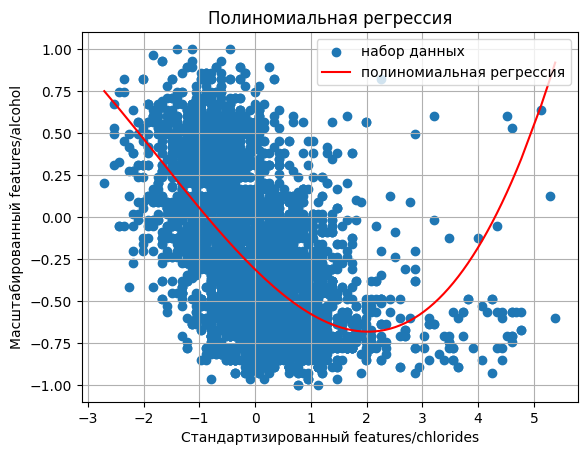

In [ ]:
y_predict_pol = pol_model.predict(x_poly)

plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict_pol[np.argsort(x_s)], color='r', label='полиномиальная регрессия')
plt.title("Полиномиальная регрессия")
plt.xlabel("Стандартизированный features/chlorides")
plt.ylabel("Масштабированный features/alcohol")
plt.legend(loc='best')
plt.grid();

**Задание 4**  
Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох на одной визуализации. На визуализации создайте легенду.

На одном графике не совсем наглядно видны все 4 кривые, лучше в моем случае разбить на два, но общий график все равно приведен ниже.

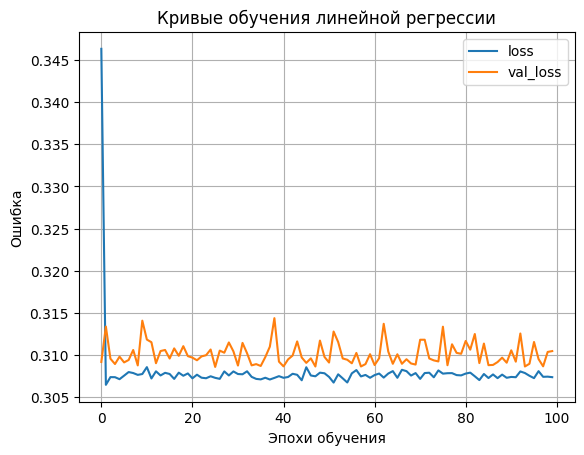

In [ ]:
def plot_loss(history, title):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.title(title)
  plt.legend()
  plt.grid(True)

plot_loss(history_line, "Кривые обучения линейной регрессии")

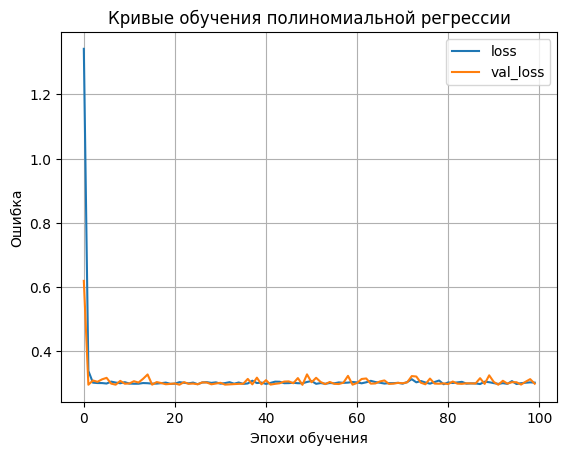

In [ ]:
plot_loss(history_pol, "Кривые обучения полиномиальной регрессии")

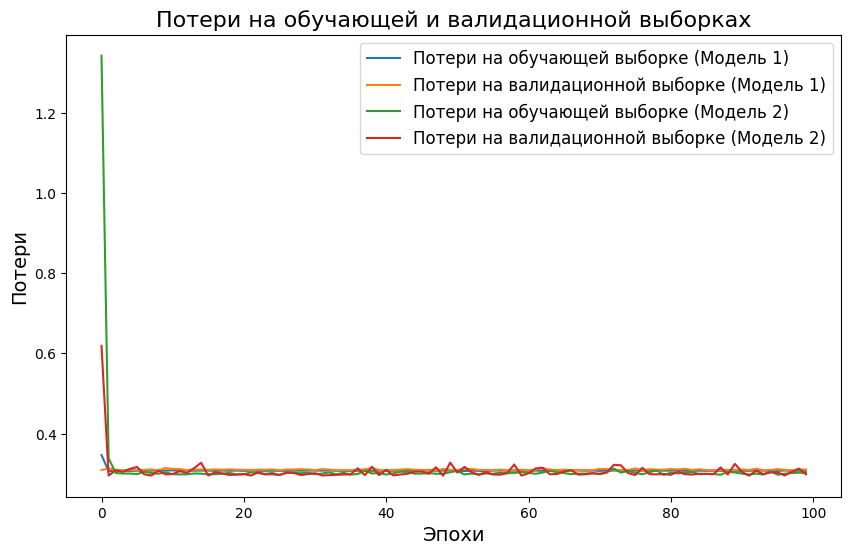

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history_line.history['loss'], label='Потери на обучающей выборке (Модель 1)')
plt.plot(history_line.history['val_loss'], label='Потери на валидационной выборке (Модель 1)')
plt.plot(history_pol.history['loss'], label='Потери на обучающей выборке (Модель 2)')
plt.plot(history_pol.history['val_loss'], label='Потери на валидационной выборке (Модель 2)')

plt.title('Потери на обучающей и валидационной выборках', fontsize=16)
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Потери', fontsize=14)
plt.legend(fontsize=12)
plt.show()

**Задание 5**  
Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.  

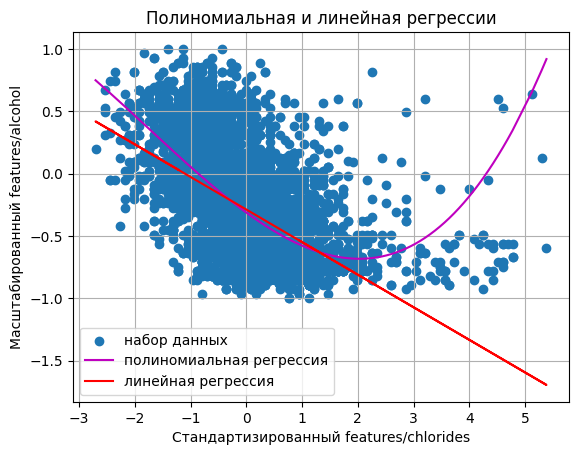

In [ ]:
plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict_pol[np.argsort(x_s)], color='m', label='полиномиальная регрессия')
plt.plot(x_s, y_predict_line, color='r', label='линейная регрессия')
plt.title("Полиномиальная и линейная регрессии")
plt.xlabel("Стандартизированный features/chlorides")
plt.ylabel("Масштабированный features/alcohol")
plt.legend(loc='best')
plt.grid();

**Задание 6**  
Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  

In [ ]:
import pandas as pd
numeric_features = data_frame.select_dtypes(include=[np.number])

# Исключение из рассмотрения независимого и зависимого признаков
independent_feature = 'features/chlorides'
dependent_feature = 'features/alcohol'

# Удаление этих признаков из списка числовых признаков
if independent_feature in numeric_features.columns:
    numeric_features.drop(columns=[independent_feature], inplace=True)
if dependent_feature in numeric_features.columns:
    numeric_features.drop(columns=[dependent_feature], inplace=True)

# Вычисление дисперсий для оставшихся числовых признаков
variances = numeric_features.var()

# Найти признак с максимальной дисперсией
max_variance_feature = variances.idxmax()
max_variance_value = variances[max_variance_feature]

print(f"Признак с максимальной дисперсией: {max_variance_feature}")
print(f"Значение дисперсии: {max_variance_value}")


Признак с максимальной дисперсией: features/total sulfur dioxide
Значение дисперсии: 1806.08544921875


**Задание 7**  
Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.  

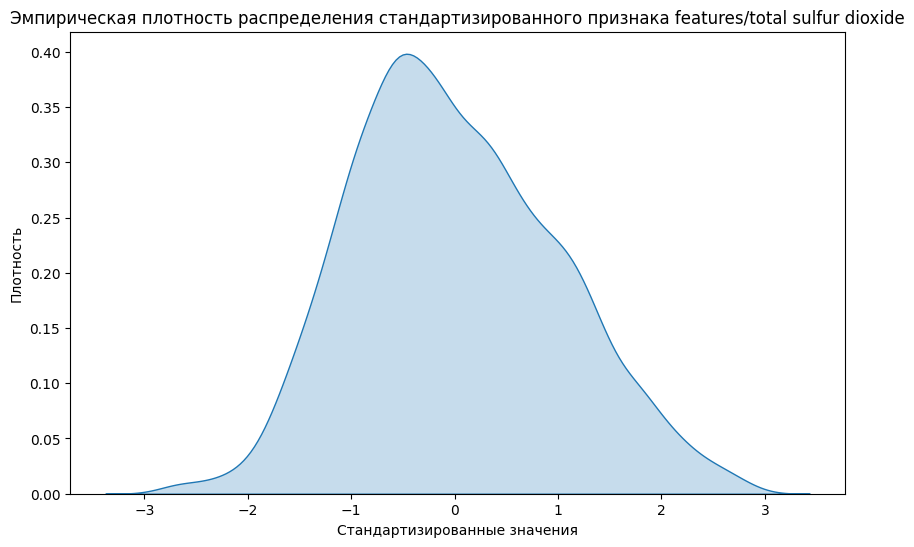

In [ ]:
import seaborn as sns

# Стандартизация признака с максимальной дисперсией
rh = cleaned_data[max_variance_feature]
rh_s = (rh - np.mean(rh)) / np.std(rh)

# Визуализация эмпирической плотности распределения стандартизированного признака
plt.figure(figsize=(10, 6))
sns.kdeplot(rh_s, fill=True)
plt.title(f'Эмпирическая плотность распределения стандартизированного признака {max_variance_feature}')
plt.xlabel('Стандартизированные значения')
plt.ylabel('Плотность')
plt.show()

**Задание 8**  
Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – сигмоида.

In [ ]:
RH_S = np.array(rh_s).reshape(-1, 1)
X_S = np.array(x_s).reshape(-1, 1)
x_expanded = np.hstack([X_S, RH_S])

# Создание нейронной сети
deep_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Входной слой для двух признаков
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)  # Выходной слой для регрессии
])

# Компиляция модели
deep_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mean_squared_error,
    metrics=['mean_absolute_error'])


# Обучение модели
history_deep = deep_model.fit(
    x_expanded, y_m,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
111/111 [==============================] - 4s 10ms/step - loss: 0.2015 - mean_absolute_error: 0.3638 - val_loss: 0.1221 - val_mean_absolute_error: 0.2897
Epoch 2/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1233 - mean_absolute_error: 0.2801 - val_loss: 0.1179 - val_mean_absolute_error: 0.2799
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1248 - mean_absolute_error: 0.2818 - val_loss: 0.1316 - val_mean_absolute_error: 0.2777
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1244 - mean_absolute_error: 0.2809 - val_loss: 0.1357 - val_mean_absolute_error: 0.3036
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1269 - mean_absolute_error: 0.2850 - val_loss: 0.1161 - val_mean_absolute_error: 0.2745
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.1197 - mean_absolute_error: 0.2752 - val_loss: 0.1175 - val_mean_absolute_error: 0.2687
Epoch 7/1

In [ ]:
deep_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                192       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12737 (49.75 KB)
Trainable params: 12737 (49.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


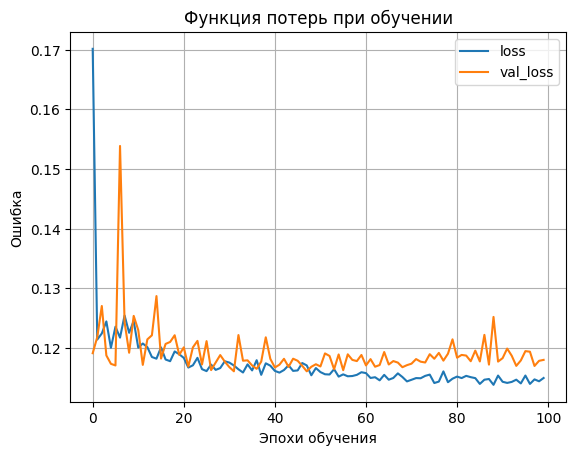

In [ ]:
plot_loss(history_deep, "Функция потерь при обучении")

**Задание 9**  
Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

200/200 [==============================] - 2s 8ms/step


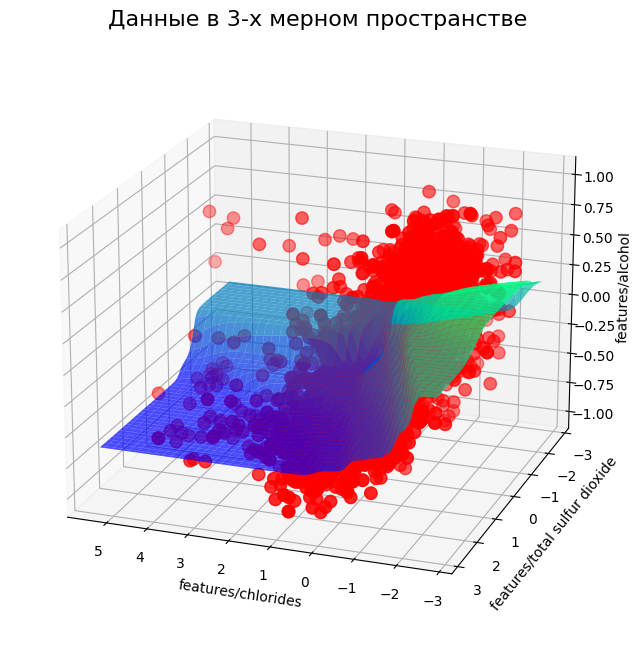

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

xs = x_expanded[:,0]
ys = x_expanded[:,1]
zs = y_m
n_plot = 80
x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
xy_2= np.column_stack([x_mesh.ravel(), y_mesh.ravel()])
z_mesh = deep_model.predict(xy_2).reshape(x_mesh.shape)

# Создание объекта Figure и объекта Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности прогноза
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.winter, alpha=0.7) #cmap=cm.coolwarm

# Добавление точек набора данных
ax.scatter( xs, ys, zs, s=80, c='r' )
ax.set_xlabel('features/chlorides')
ax.set_ylabel('features/total sulfur dioxide')
ax.set_zlabel('features/alcohol')
ax.set_title('Данные в 3-х мерном пространстве', fontsize=16)
ax.view_init(elev = 20, azim = 110)


**Задание 10**  
Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_expanded, y_m, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3530, 2), (883, 2), (3530,), (883,))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

x_train, x_test, y_train, y_test = train_test_split(x_expanded, y_m, test_size=0.2, random_state=42)

# Списки для хранения показателей качества на обучающей и тестовой выборках
train_scores = []
test_scores = []

feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(x_expanded)

# Обучение модели на различном количестве обучающих точек
for i in range(100, len(x_train)+1, 250):
    model = tf.keras.Sequential([
      feature_normalizer,
      tf.keras.layers.Dense(units=64, activation='tanh'),
      tf.keras.layers.Dense(units=1)
      ])
    model.compile(optimizer=SGD(learning_rate=0.001), loss='mae', metrics=['mae'])
    history = model.fit(x_train[:i], y_train[:i], epochs=50, verbose=1)

    # Оценка качества на обучающей выборке
    y_train_pred = model.predict(x_train[:i])
    train_mae = mean_absolute_error(y_train[:i], y_train_pred)
    train_scores.append(train_mae)

    # Оценка качества на тестовой выборке
    y_test_pred = model.predict(x_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_scores.append(test_mae)

Epoch 1/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2282 - mae: 0.2282
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2299 - mae: 0.2299
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2250 - mae: 0.2250
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2260 - mae: 0.2260
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2226 - mae: 0.2226
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2259 - mae: 0.2259
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2308 - mae: 0.2308
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2248 - mae: 0.2248
Epoch 9/30
4/4 [==============================] - 0s 6ms/step - loss: 0.2232 - mae: 0.2232
Epoch 10/30
4/4 [==============================] - 0s 7ms/step - loss: 0.2224 - mae: 0.2224
Epoch 11/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2427 - mae: 0.24

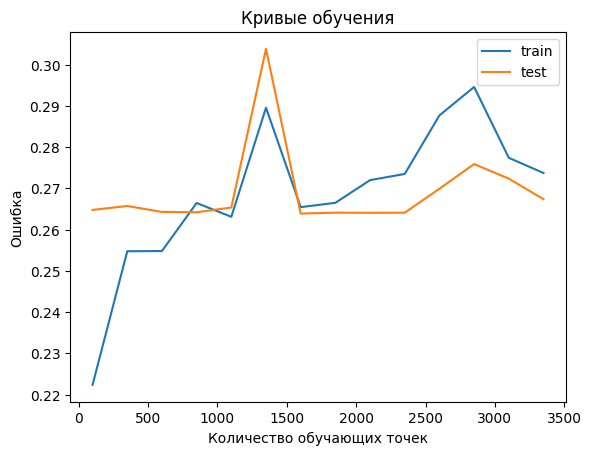

In [ ]:
# Визуализация кривых обучения
plt.plot([i for i in range(100, len(X_train), 250)], train_score, label="train")
plt.plot([i for i in range(100, len(X_train), 250)], test_score, label="test")
plt.title('Кривые обучения')
plt.xlabel('Количество обучающих точек')
plt.ylabel('Ошибка')
plt.legend()
plt.show()